In [1]:
#!pip install shap


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import pickle

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
rerun = False # True

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/markusloecher/shap/master/Explore/titanicnoMissingAge.csv') # Load the data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,S
5,7,0,1,"McCarthy, Mr. Timothy J",2,54.0,0,0,17463,51.8625,E46,S
6,8,0,3,"Palsson, Master. Gosta Leonard",2,2.0,3,1,349909,21.0750,NaN,S
7,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
8,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C
9,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S


In [3]:
Y = df['Survived']
X =  df[['Age', 'Pclass','Sex', 'PassengerId']]
X_train = X
Y_train = Y
# Split the data into train and test data:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [4]:
def plotImp(importances,features, main = 'Feature Importances',xlab='Relative Importance'):
    indices = np.argsort(importances)
    #features = X_train.columns
    plt.title(main)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel(xlab)
    plt.show()

In [16]:
np.random.seed(0)
rf = RandomForestRegressor(max_depth=50, random_state=0, n_estimators=100,max_features=2)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)
importances = rf.feature_importances_
features = X_train.columns

[0.26095584 0.1356508  0.27659907 0.32679429]


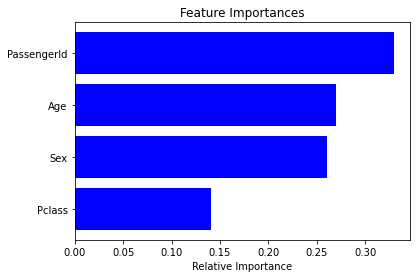

In [33]:
plotImp(importances,features)

In [17]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


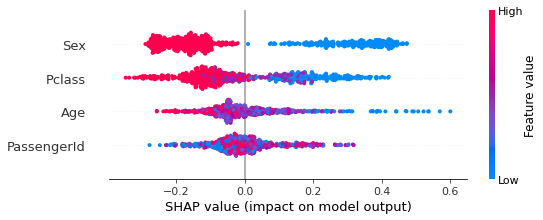

In [18]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In [19]:
np.savetxt("shap_values_titanic.csv", shap_values, delimiter=",") 

In [22]:
shap_values

array([[-0.03678392, -0.12312051, -0.22862592, -0.00781419],
       [-0.00869016,  0.20548461,  0.35388744,  0.01297358],
       [ 0.05550437, -0.06968939,  0.36775498,  0.1600855 ],
       ...,
       [ 0.02055941,  0.23894326,  0.30788914, -0.04373635],
       [ 0.12553059,  0.32880117, -0.14148837,  0.00081208],
       [ 0.07912068, -0.07412343, -0.12684321, -0.07449857]])

In [13]:
# load JS visualization code to notebook
shap.initjs()
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)